In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_data = pd.read_csv('city_data.csv')
ride_data = pd.read_csv('ride_data.csv')

print(city_data.columns)
city_data = city_data.dropna(how='any')

Index(['city', 'driver_count', 'type'], dtype='object')


In [4]:
ride_data.head()
print(ride_data.columns)
ride_data = ride_data.dropna(how='any')

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')


In [5]:
merged = pd.merge(ride_data, city_data, on="city")
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [6]:
Rural_data = merged.loc[merged["type"] == "Rural"]
Urban_data = merged.loc[merged["type"] == "Urban"]
Suburban_data = merged.loc[merged["type"] == "Suburban"]

In [7]:
Rural = Rural_data.groupby(['city'])
Average_Rural = Rural.mean()
Suburban = Suburban_data.groupby(['city'])
Average_Suburban = Suburban.mean()
Urban = Urban_data.groupby(['city'])
Average_Urban = Urban.mean()

In [8]:
rural_fare = Average_Rural['fare']
urban_fare = Average_Urban['fare']
suburban_fare = Average_Suburban['fare']

In [9]:
RC_data = city_data.loc[city_data["type"] == "Rural"]
UC_data = city_data.loc[city_data["type"] == "Urban"]
SC_data = city_data.loc[city_data["type"] == "Suburban"]

NofRrural = RC_data['driver_count']
NofRurban = UC_data['driver_count']
NofRsuburban = SC_data['driver_count']

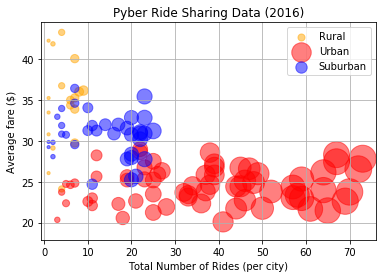

In [26]:
plt.scatter(NofRrural, rural_fare, marker="o", facecolors="orange", edgecolors="orange", s=NofRrural*10, alpha=0.5)
plt.scatter(NofRurban, urban_fare, marker="o", facecolors="red", edgecolors="red", s=NofRurban*10, alpha=0.5)
plt.scatter(NofRsuburban, suburban_fare, marker="o", facecolors="blue", edgecolors="blue", s=NofRsuburban*10, alpha=0.5)
plt.xlim(0,40)

plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.xlim(-0.75, len(NofRurban)+10)
plt.legend(loc="upper right")
plt.grid(True)

plt.legend(["Rural", "Urban", "Suburban"])

plt.savefig("Pyber Ride.png")

Total Fares

In [199]:
Total_ruralfare = Rural['fare'].sum()
TRF = Total_ruralfare.sum()
Total_suburbanfare = Suburban['fare'].sum()
TSF = Total_suburbanfare.sum()
Total_urbanfare = Urban['fare'].sum()
TUF = Total_urbanfare.sum()

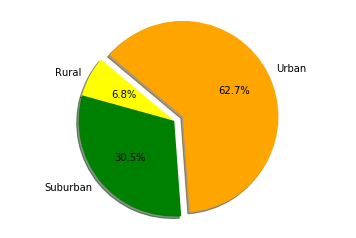

In [206]:
Zones = ['Rural', 'Suburban', 'Urban']
Zones_count = [TRF, TSF, TUF]
colors = ["yellow", "green", "orange"]
explode = (0, 0, 0.1,)

plt.pie(Zones_count, explode=explode, labels=Zones, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.savefig("Total Fares.png")

 Total Rides by City Type

In [201]:
RinR = Rural['ride_id'].count()
TRinR = RinR.sum()
RinS = Suburban['ride_id'].count()
TRinS = RinS.sum()
RinU = Urban['ride_id'].count()
TRinU = RinU.sum()
print(TRinR, TRinS, TRinU)

125 625 1625


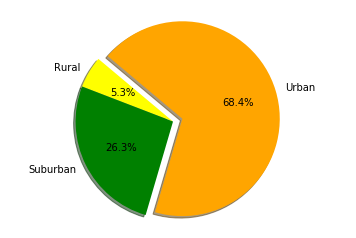

In [207]:
ZonesN = ['Rural', 'Suburban', 'Urban']
ZonesN_count = [TRinR, TRinS, TRinU]
colors = ["yellow", "green", "orange"]
explode = (0, 0, 0.1,)

plt.pie(ZonesN_count, explode=explode, labels=ZonesR, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.savefig("Total Rides.png")

Total Drivers by City Type

In [203]:
TRR = RC_data['driver_count'].sum()
TSR = SC_data['driver_count'].sum()
TUR = UC_data['driver_count'].sum()

print(Total_ruralrides, Total_suburbanrides, Total_urbanrides)

78 490 2405


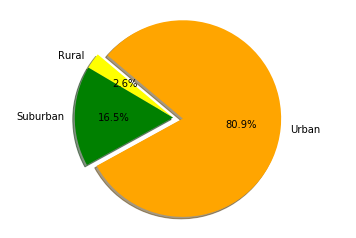

In [208]:
ZonesR = ['Rural', 'Suburban', 'Urban']
ZonesR_count = [TRR, TSR, TUR]
colors = ["yellow", "green", "orange"]
explode = (0, 0, 0.1,)

plt.pie(ZonesR_count, explode=explode, labels=ZonesR, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.savefig("Total Drivers.png")